<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# 학습 내용

- 이후 전처리 프로젝트에서 요긴하게 사용될 몇몇 기능을 추가로 배웁니다.

## 1. 라이브러리 불러오기

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

## 2. 파일 읽어오기

In [2]:

# 파일 불러오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/orders_sample.csv'
orders = pd.read_csv(path)

#한글이 있어 옵션을 추가하세요~
#orders = pd.read_cav(path,~~~~~)

# 데이터 확인
orders.head(10)

,order_date,product,quantity,amount
0,2019-01-02,p1030071,2,7900
1,2019-01-02,p1012761,1,1700
2,2019-01-02,p1012581,1,1000
3,2019-01-02,p1175481,1,1300
4,2019-01-02,p1178011,1,8800
5,2019-01-02,p1012751,2,2700
6,2019-01-02,p1097821,1,1000
7,2019-01-02,p1178011,1,8800
8,2019-01-02,p1178011,1,8800
9,2019-01-02,p1194801,1,8200


In [7]:
# 기초 통계정보
# orders.describe()

#소수점 4자리 까지 표현해줘
orders.describe().apply(lambda y : y.apply('{:,.2f}'.format))

,quantity,amount
count,"68,839.00","68,839.00"
mean,1.27,"2,847.06"
std,1.37,"2,634.38"
min,1.00,250.00
25%,1.00,"1,300.00"
50%,1.00,"1,950.00"
75%,1.00,"3,227.00"
max,200.00,"109,100.00"


In [52]:
# 문자열 형태의 열의 일부 값 변경하기 p109222 --> P109222
# .str 의 경우 모든 문자열에 적용시키기 위해 사용함
orders['product'].str.replace('p','P')
#or
#orders['product'].str.upper()

0        P1030071
1        P1012761
2        P1012581
3        P1175481
4        P1178011
           ...   
68834    P1201601
68835    P1002841
68836    P1012761
68837    P1005891
68838    P1179241
Name: product, Length: 68839, dtype: object

In [53]:
# 문자열 형태의 열의 특정 위치 문자 가져오기
orders['product'].str[-2:] + '번'

0        71번
1        61번
2        81번
3        81번
4        11번
        ... 
68834    01번
68835    41번
68836    61번
68837    91번
68838    41번
Name: product, Length: 68839, dtype: object

In [54]:
# 숫자 형태의 열을 문자 형태로 변경
# 숫자 + '문자열' 이 안돼서 astype(str) 사용
orders['quantity'].astype(str) + '개' 

0        2개
1        1개
2        1개
3        1개
4        1개
         ..
68834    1개
68835    1개
68836    1개
68837    1개
68838    1개
Name: quantity, Length: 68839, dtype: object

## 3.데이터 전처리

### 3.1.날짜 정보 처리

**1) 날짜 정보 추출 방법 #1**

* 문자열 형식의 날짜에서 년,월,일은 split() 메소드를 사용해 얻을 수 있습니다. 

In [55]:
# year, month, day 추출 방법 #1
# pandas 데이터 한 '열' 에 대해 split 을쓸대 앞에 str.split()으로 표현한다.
year = orders['order_date'].str.split('-').str[0]
month = orders['order_date'].str.split('-').str[1]
day = orders['order_date'].str.split('-').str[2]

# 확인
print(year.head())
print(month.head())
print(day.head())

0    2019
1    2019
2    2019
3    2019
4    2019
Name: order_date, dtype: object
0    01
1    01
2    01
3    01
4    01
Name: order_date, dtype: object
0    02
1    02
2    02
3    02
4    02
Name: order_date, dtype: object


**2) 날짜 정보 추출 방법 #2**

* 날짜를 datetime 데이터 형식으로 바꾸면 쉽게 날짜 관련 정보를 얻을 수 있습니다.

In [56]:
# year, month, day 추출 방법 #2
year = pd.to_datetime(orders['order_date']).dt.year
month = pd.to_datetime(orders['order_date']).dt.month
day = pd.to_datetime(orders['order_date']).dt.day
weekday = pd.to_datetime(orders['order_date']).dt.weekday  # 월:0~ 일:6

# 확인
print(year.head())
print(month.head())
print(day.head())
print(weekday.head())

0    2019
1    2019
2    2019
3    2019
4    2019
Name: order_date, dtype: int64
0    1
1    1
2    1
3    1
4    1
Name: order_date, dtype: int64
0    2
1    2
2    2
3    2
4    2
Name: order_date, dtype: int64
0    2
1    2
2    2
3    2
4    2
Name: order_date, dtype: int64


**3) 날짜 정보 열 추가**

* 얻어진 날짜 정보를 새로운 열로 저장합니다.

In [57]:
# 열 추가 (날짜 형태의 문자열 열에서 날짜 정보 얻기)
# weekday 를 가져오기위해 to_datetime 을 이용해야한다

orders['year'] = pd.to_datetime(orders['order_date']).dt.year
orders['month'] = pd.to_datetime(orders['order_date']).dt.month
orders['weekday'] = pd.to_datetime(orders['order_date']).dt.weekday

# 확인
orders.head()

,order_date,product,quantity,amount,year,month,weekday
0,2019-01-02,p1030071,2,7900,2019,1,2
1,2019-01-02,p1012761,1,1700,2019,1,2
2,2019-01-02,p1012581,1,1000,2019,1,2
3,2019-01-02,p1175481,1,1300,2019,1,2
4,2019-01-02,p1178011,1,8800,2019,1,2


**4) 요일을 이름으로 변경**

* 요일 정보를 이해하기 쉽게 이름으로 바꿔줍니다.

In [58]:
# 요일 변경
orders['weekday'] = orders['weekday'].map({0: 'mon',
                                           1: 'tue', 
                                           2: 'wed', 
                                           3: 'thu', 
                                           4: 'fri', 
                                           5: 'sat', 
                                           6: 'sun'})

# 확인
orders.head()

,order_date,product,quantity,amount,year,month,weekday
0,2019-01-02,p1030071,2,7900,2019,1,wed
1,2019-01-02,p1012761,1,1700,2019,1,wed
2,2019-01-02,p1012581,1,1000,2019,1,wed
3,2019-01-02,p1175481,1,1300,2019,1,wed
4,2019-01-02,p1178011,1,8800,2019,1,wed


### 3.2.그룹 집계화 시각화

**1) 그룹 집계 #1**

* 그룹별 집계는 데이터를 이해하는 데 큰 역할을 합니다.

In [59]:
# 집계
tmp = orders.groupby(by=['year', 'month'], as_index=False)[['quantity', 'amount']].sum()

# 확인
tmp.head()

,year,month,quantity,amount
0,2019,1,5505,14280112
1,2019,2,5369,14439692
2,2019,3,6275,17135535
3,2019,4,6424,15256018
4,2019,5,6603,13992944


**2) 그룹 집계 #2**

* 조건 조회를 통해 원하는 기간의 데이터만 집계 대상으로 삼을 수 있습니다.

In [60]:
# 2019 년 집계
orders2019 = orders.loc[orders['year']==2019, :]
tmp = orders2019.groupby(by=['month'], as_index=False)[['quantity', 'amount']].sum()

# 확인
tmp.head()

,month,quantity,amount
0,1,5505,14280112
1,2,5369,14439692
2,3,6275,17135535
3,4,6424,15256018
4,5,6603,13992944


**3) 막대 그래프 시각화**

* 범주형 데이터 크기를 비교할 때 막대 그래프를 사용합니다.

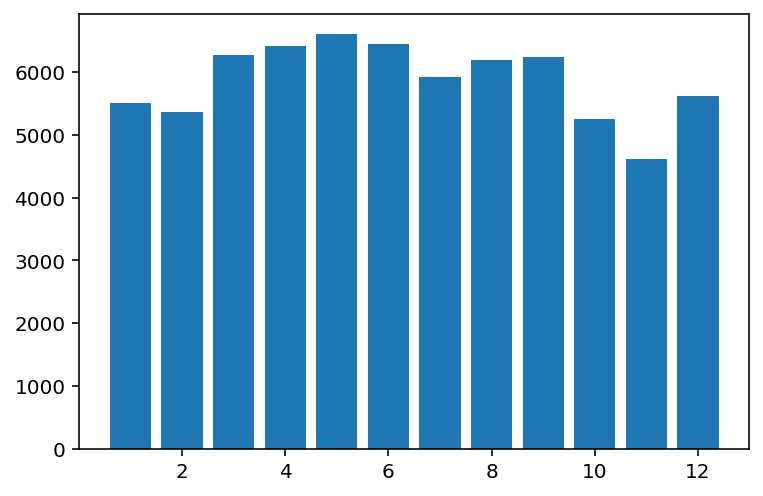

In [61]:
# 시각화
plt.bar(tmp['month'], tmp['quantity'])
plt.show()

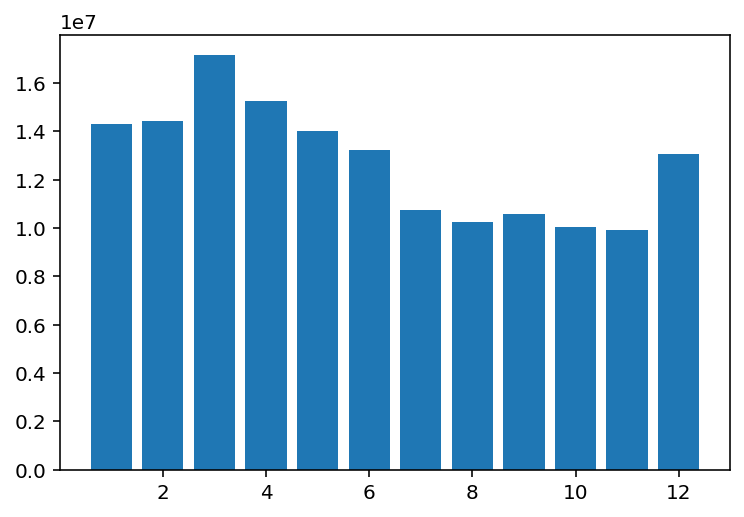

In [62]:
# 시각화
plt.bar(tmp['month'], tmp['amount'])
plt.show()

**4) 정렬**

* 값을 정렬해 표시하면 또 다른 통찰력을 얻을 수 있습니다.

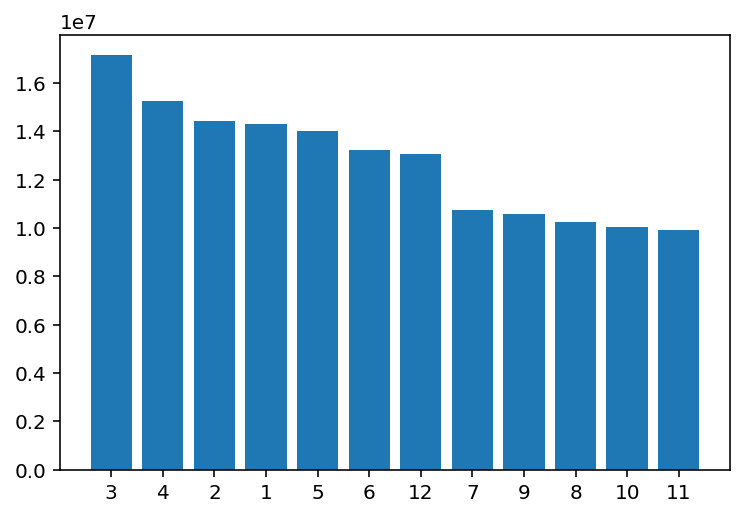

In [63]:
# 판매 금액 순 정렬
tmp = tmp.sort_values(by='amount', ascending=False)
tmp['month'] = tmp['month'].astype(str) # 데이터 형식을 str 로 변환 
# 막대그래프 특성에 숫자인경우 순서대로 나열하는 특성이있어 위의 한줄을 추가해주어야 
# amount 값의 내림차순에 맞게 x축이 정렬이됨!!

# 시각화
plt.bar(tmp['month'], tmp['amount'])
plt.show()

### 3.시각화 약간 향상

**1) 선 그래프 시각화**

* 연속형 데이터 변경 추이를 볼 때 선 그래프를 사용합니다.
* y 축 값을 지수 형태가 아닌 원래 값이 보이게 합니다.

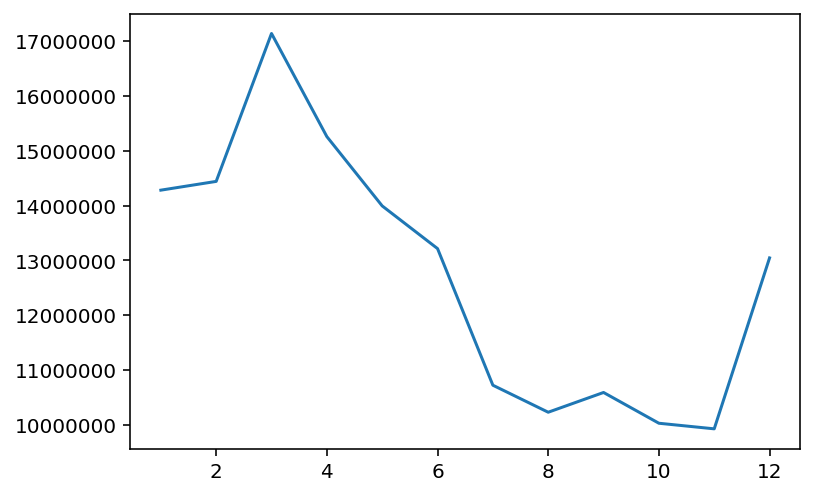

In [67]:
# 다시 정렬
tmp['month'] = tmp['month'].astype(int)
tmp = tmp.sort_values(by='month', ascending=True)

# 시각화
plt.plot(tmp['month'], tmp['amount'])
plt.ticklabel_format(axis='y',style='plain')
plt.show()

**2) 축 값 제어**

* 우선 상품별 판매 현황을 집계하고 판매 금액 기준 TOP 10을 추출합니다.

In [69]:
# 상품별 집계
tmp = orders.groupby(by='product', as_index=False)[['quantity', 'amount']].sum()


tmp = tmp.sort_values(by='amount', ascending=False).head(10)

# # 확인
tmp

,product,quantity,amount
22,p1072601,4057,18122113
43,p1178011,1659,14129078
1,p1002841,907,11064509
4,p1005891,5189,10108897
46,p1194801,996,7562421
3,p1005771,3979,7348918
42,p1175481,5450,6987517
60,p1284851,2353,6445713
18,p1030071,1751,6369971
47,p1200641,787,5490530


* 선 그래프로 시각화하니 x 축 값이 겹쳐져 보입니다.

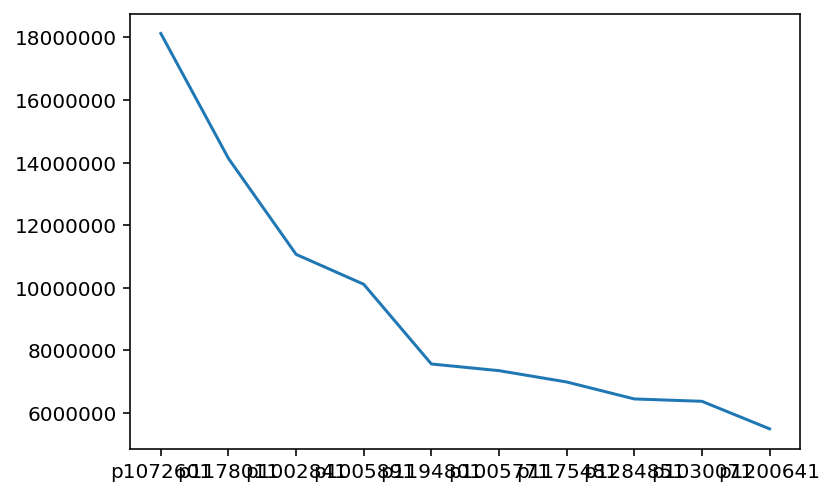

In [38]:
# 시각화
plt.plot(tmp['product'], tmp['amount'])
plt.ticklabel_format(axis='y', style='plain')
plt.show()

* 크기를 늘리거나, x 축 값을 기울여 표시하면 겹치는 문제를 해결할 수 있습니다.

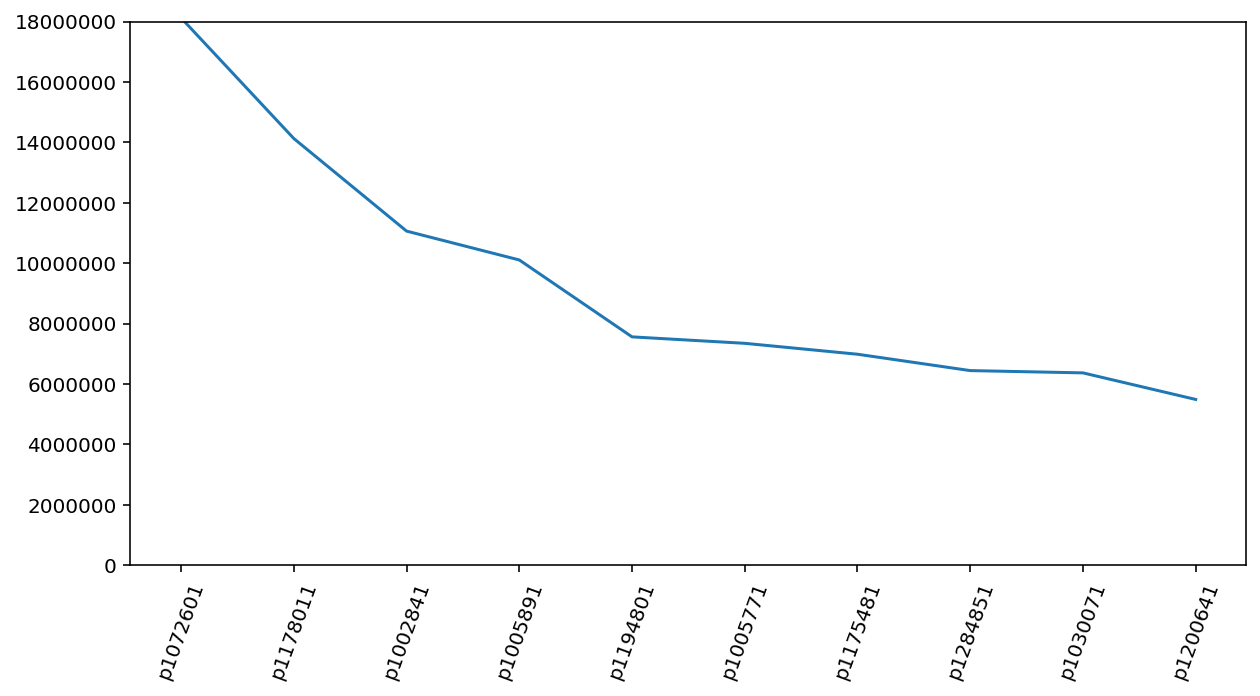

In [39]:
# 시각화
plt.figure(figsize=(10, 5))
plt.plot(tmp['product'], tmp['amount'])
plt.ticklabel_format(axis='y', style='plain') # 지수형태로 표시되는 값을 정수로 돌려주기
plt.xticks(rotation=70) # 축 값 회전
plt.ylim(0,18000000)  # y 값의 (최소,최대)범위 설정
plt.show()